In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import (
    model_selection,
    preprocessing,
)
b = load_boston()
bos_X = pd.DataFrame(
    b.data, columns=b.feature_names
)
bos_y = b.target
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
    bos_X,
    bos_y,
    test_size=0.3,
    random_state=42,
)
bos_sX = preprocessing.StandardScaler().fit_transform(
    bos_X
)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
    bos_sX,
    bos_y,
    test_size=0.3,
    random_state=42,
)

In [2]:
rfr = RandomForestRegressor(
    random_state=42, n_estimators=100
)
rfr.fit(bos_X_train, bos_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [3]:
from sklearn import metrics
rfr.score(bos_X_test, bos_y_test)
bos_y_test_pred = rfr.predict(bos_X_test)
metrics.r2_score(bos_y_test, bos_y_test_pred)

0.8721182042634867

In [4]:
metrics.explained_variance_score(
    bos_y_test, bos_y_test_pred
)

0.8724890451227875

In [5]:
metrics.mean_absolute_error(
    bos_y_test, bos_y_test_pred
)

2.0839802631578945

In [6]:
metrics.mean_squared_error(
    bos_y_test, bos_y_test_pred
)

9.52886846710526

In [7]:
metrics.mean_squared_log_error(
    bos_y_test, bos_y_test_pred
)

0.021282630617764326

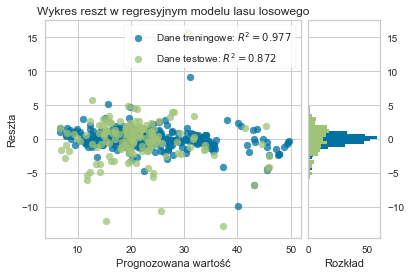

In [46]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(figsize=(6, 4))
rpv = ResidualsPlot(rfr)
rpv.fit(bos_X_train, bos_y_train)
rpv.score(bos_X_test, bos_y_test)
rpv.ax.set(title="Wykres reszt w regresyjnym modelu lasu losowego", xlabel="Prognozowana wartość", ylabel="Reszta")
rpv.ax.legend(('Dane treningowe: $R^2 = {:0.3f}$'.format(rpv.train_score_), 
               'Dane testowe: $R^2 = {:0.3f}$'.format(rpv.test_score_)
              ), frameon=True, loc="best")
rpv.hax.set_xlabel("Rozkład")
#fig.savefig("images/mlpr_1501.png", dpi=300)

In [53]:
import statsmodels.stats.api as sms
resids = bos_y_test - rfr.predict(bos_X_test)
hb = sms.het_breuschpagan(resids, bos_X_test)
labels = [
    "Test mnożnika Lagrange'a",
    "p-wartość",
    "f-wartość",
    "f p-wartość",
]
for name, num in zip(labels, hb):
    print(f"{name}: {num:.2}")

Test mnożnika Lagrange'a: 3.6e+01
p-wartość: 0.00036
f-wartość: 3.3
f p-wartość: 0.00022


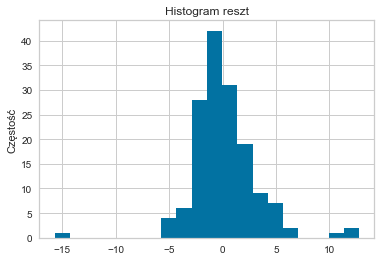

In [55]:
fig, ax = plt.subplots(figsize=(6, 4))
resids = bos_y_test - rfr.predict(bos_X_test)
pd.Series(resids, name="residuals").plot.hist(
    bins=20, ax=ax, title="Histogram reszt"
)
ax.set(ylabel="Częstość")
#fig.savefig("images/mlpr_1502.png", dpi=300)

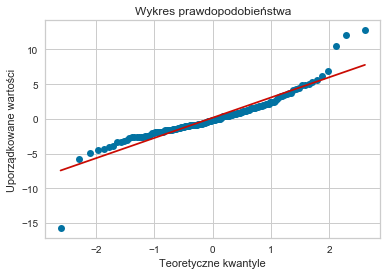

In [56]:
from scipy import stats
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids, plot=ax)
ax.set(title="Wykres prawdopodobieństwa", xlabel="Teoretyczne kwantyle", ylabel="Uporządkowane wartości")
#fig.savefig("images/mlpr_1503.png", dpi=300)

In [50]:
stats.kstest(resids, cdf="norm")

KstestResult(statistic=0.1962230021010155, pvalue=1.3283596864962378e-05)

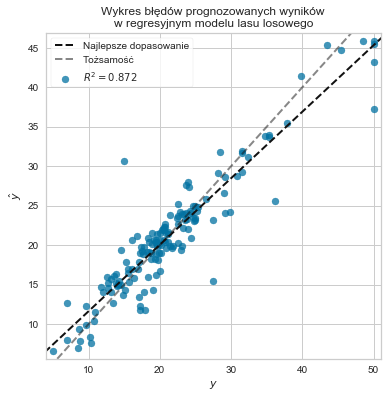

In [73]:
from yellowbrick.regressor import (
    PredictionError,
)
from yellowbrick.bestfit import draw_identity_line
fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(rfr)
pev.fit(bos_X_train, bos_y_train)
pev.score(bos_X_test, bos_y_test)
pev.ax.set(title="Wykres błędów prognozowanych wyników\nw regresyjnym modelu lasu losowego", 
           xlabel="$y$", ylabel=r"$\hat{y}$")
draw_identity_line(
    ax=pev.ax,
    ls="--",
    lw=2,
    c=pev.colors["line"],
    alpha=0.5,
    label="tożsamość",
)
pev.ax.legend(("Najlepsze dopasowanie", "Tożsamość", "$R^2 = {:0.3f}$".format(pev.score_)), loc="best", frameon=True)
#fig.savefig("images/mlpr_1504.png", dpi=300)